In [ ]:
from google.colab import drive
import os
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def evaluate_random_samples(data_directory, model_path, n_samples=20):
    random.seed(42)

    # Load the model
    random_forest = load(model_path)

    # Create a sequence of file names
    train_file_numbers = range(1,8328)
    train_file_names = [os.path.join(data_directory, f"Group8_{str(i).zfill(4)}.csv") for i in train_file_numbers]

    # Randomly select files
    selected_file_names = random.sample(train_file_names, n_samples)

    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    count = 0

    for name in selected_file_names:
        count += 1

        # Extract just the filename from the full path
        filename = os.path.basename(name)

        # Read and preprocess the CSV file
        df = pd.read_csv(name)
        df = df.fillna(0)
        df["Mineral Phase"] = df["Mineral Phase"].astype(str)
        df = df.drop(df.iloc[:, 2800:-2], axis=1)
        df = df.drop(df.iloc[:, :126], axis=1)
        X_test = df.iloc[:,:-1]
        y_test = df.iloc[:,-1].astype(str)

        # Model predictions
        y_pred = random_forest.predict(X_test)
        y_prob = random_forest.predict_proba(X_test)

        # Compute average probabilities
        avg_probabilities = y_prob.mean(axis=0)
        avg_probabilities_dict = {class_: avg_probabilities[i] for i, class_ in enumerate(random_forest.classes_)}
        sorted_probs = dict(sorted(avg_probabilities_dict.items(), key=lambda item: item[1], reverse=True)[:10])

        # Compute metrics
        report = classification_report(y_test, y_pred, zero_division=1)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

        # Store metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        # Calculate average, min, and max metrics
        avg_accuracy = sum(accuracy_list) / len(accuracy_list)
        avg_precision = sum(precision_list) / len(precision_list)
        avg_recall = sum(recall_list) / len(recall_list)
        avg_f1 = sum(f1_list) / len(f1_list)

        # Print results
        print(f"The classification report for {filename} ({count}):\n{report}")
        print(f"Accuracy ({count}): {avg_accuracy:.2%}          (Min: {min(accuracy_list):.2%}, Max: {max(accuracy_list):.2%})")
        print(f"Precision ({count}): {avg_precision:.2%}        (Min: {min(precision_list):.2%}, Max: {max(precision_list):.2%})")
        print(f"Recall ({count}): {avg_recall:.2%}              (Min: {min(recall_list):.2%}, Max: {max(recall_list):.2%})")
        print(f"F1 Score ({count}): {avg_f1:.2%}                (Min: {min(f1_list):.2%}, Max: {max(f1_list):.2%})\n")

        # Plot results
        plt.barh(list(sorted_probs.keys()), list(sorted_probs.values()))
        plt.title(f"Probabilities for {filename}")
        plt.xticks(rotation=90)
        plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | e

The classification report for Group8_1825.csv (1):
               precision    recall  f1-score   support

  Al-Silicate       0.29      1.00      0.44         2
AlFe-Silicate       0.69      0.37      0.48       629
 AlK-Silicate       0.48      0.99      0.64       176
AlMn-Silicate       0.89      0.95      0.92        83
   Background       1.00      0.79      0.88      1376
  Cassiterite       0.90      1.00      0.95       113
     Chromite       0.50      1.00      0.67         2
     Fe-Oxide       0.98      0.92      0.95      4330
  Fe-Silicate       0.64      0.93      0.76       698
     Ilmenite       0.77      0.96      0.86       175
    Leucoxene       0.00      1.00      0.00         0
     Mn-Oxide       0.75      1.00      0.86         3
     Monazite       0.60      1.00      0.75         9
       Quartz       0.46      1.00      0.63       205
 REE-Silicate       0.00      1.00      0.00         0
       Rutile       1.00      0.88      0.93         8
      Thorite

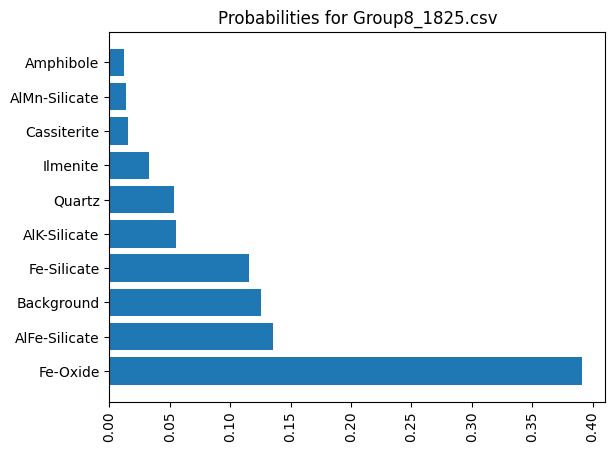

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s


The classification report for Group8_0410.csv (2):
                  precision    recall  f1-score   support

        Al-Oxide       0.03      1.00      0.07         1
     Al-Silicate       0.22      0.94      0.36        36
   AlCa-Silicate       0.42      1.00      0.59        20
   AlFe-Silicate       0.83      0.88      0.85      1524
AlFe-Silicate_Zn       0.20      0.50      0.29         2
    AlK-Silicate       0.33      0.98      0.49       152
   AlMn-Silicate       0.58      1.00      0.73        11
       Amphibole       0.51      0.47      0.49        49
         Apatite       0.75      0.99      0.85        68
      Background       1.00      0.78      0.88      3543
     Cassiterite       0.76      0.99      0.86       568
        Chromite       1.00      0.00      0.00         3
         Epidote       0.79      0.55      0.65        80
        Fe-Oxide       0.87      0.64      0.74       528
     Fe-Silicate       0.69      0.77      0.72       262
     Fe-Sulphide    

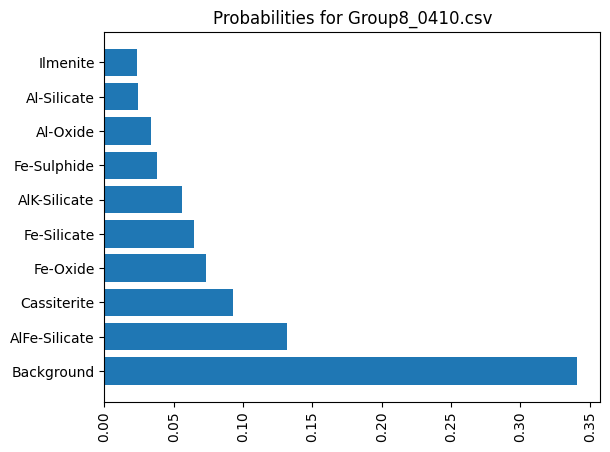

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_4507.csv (3):
                  precision    recall  f1-score   support

        Al-Oxide       0.21      1.00      0.35         3
     Al-Silicate       0.64      0.91      0.75        32
   AlCa-Silicate       0.50      1.00      0.67         1
   AlFe-Silicate       0.82      0.56      0.66       227
   AlMn-Silicate       0.92      0.80      0.86        56
       Amphibole       0.88      0.78      0.82         9
      Background       0.89      0.94      0.92       303
         Epidote       0.91      0.91      0.91        11
        Fe-Oxide       0.99      0.99      0.99      6163
     Fe-Silicate       0.68      0.88      0.77        34
        Ilmenite       0.98      0.89      0.93       488
       Leucoxene       0.41      1.00      0.58        36
        Mn-Oxide       0.00      1.00      0.00         0
        Monazite       1.00      0.50      0.67         2
Nb-bearing phase       0.36      1.00      0.53         4
          Rutile    

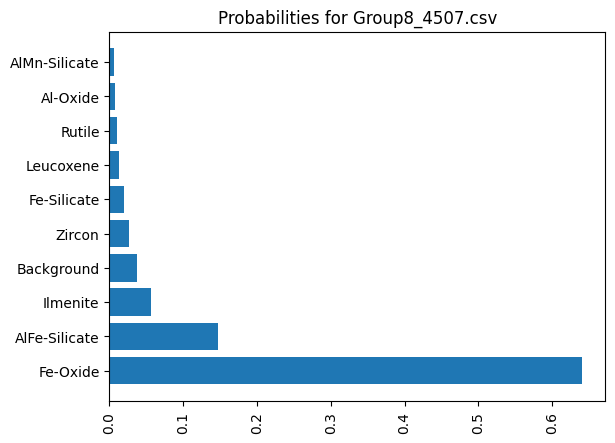

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s


The classification report for Group8_4013.csv (4):
                  precision    recall  f1-score   support

        Al-Oxide       0.06      1.00      0.12         1
     Al-Silicate       0.83      1.00      0.91         5
   AlFe-Silicate       0.84      0.66      0.74       420
AlFe-Silicate_Zn       0.06      1.00      0.11         1
    AlK-Silicate       0.25      0.67      0.36         3
   AlMn-Silicate       0.95      0.91      0.93       227
       Amphibole       0.75      0.91      0.82        23
      Background       0.94      0.94      0.94       336
    Columbite_Mn       0.95      0.86      0.90        21
        Fe-Oxide       0.97      0.96      0.97      3390
     Fe-Silicate       0.68      0.87      0.77       148
        Ilmenite       0.98      0.92      0.95      2627
       Leucoxene       0.45      1.00      0.62       127
        Mn-Oxide       0.00      1.00      0.00         0
        Monazite       0.81      0.92      0.86        51
Nb-bearing phase    

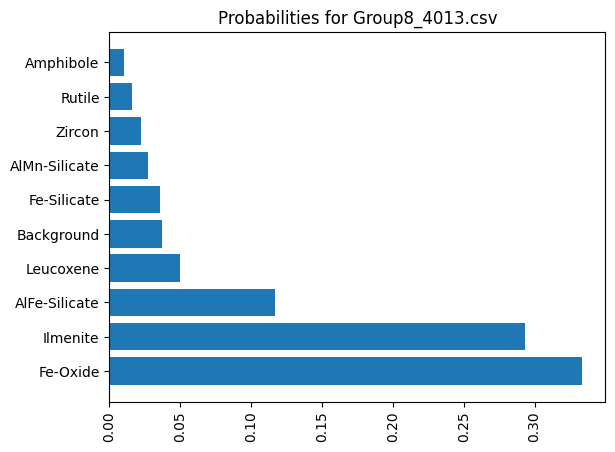

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_3658.csv (5):
                  precision    recall  f1-score   support

   AlFe-Silicate       0.48      0.25      0.33       291
AlFe-Silicate_Zn       0.00      1.00      0.00         0
    AlK-Silicate       0.50      1.00      0.67         1
      Background       0.97      0.91      0.94       900
          Barite       0.78      1.00      0.88       420
        Fe-Oxide       0.96      0.97      0.96      5853
     Fe-Silicate       0.69      0.98      0.81       197
     Fe-Sulphide       0.00      1.00      0.00         0
        Ilmenite       0.89      0.38      0.53        45
       Leucoxene       0.25      1.00      0.40         1
        Monazite       1.00      0.00      0.00         8
          Quartz       0.60      1.00      0.75         3
          Rutile       0.80      1.00      0.89        20
         Unknown       1.00      0.00      0.00         5
          Zircon       0.90      0.99      0.94        86

        accuracy   

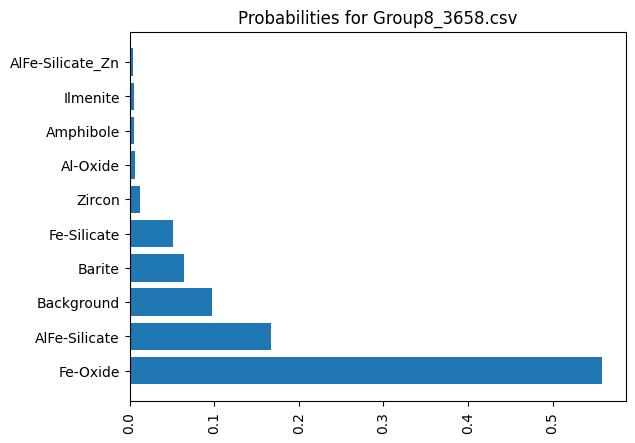

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_2287.csv (6):
               precision    recall  f1-score   support

AlFe-Silicate       0.54      0.30      0.39       511
 AlK-Silicate       0.00      1.00      0.00         0
AlMn-Silicate       0.97      0.93      0.95       137
   Background       0.97      0.94      0.95       710
     Fe-Oxide       0.95      0.94      0.94      5630
  Fe-Silicate       0.65      0.96      0.77       628
     Ilmenite       1.00      0.90      0.95        21
    Leucoxene       0.50      1.00      0.67         1
     Mn-Oxide       0.00      0.00      0.00         1
     Monazite       1.00      0.83      0.91         6
       Quartz       0.33      1.00      0.50         2
 REE-Silicate       0.00      1.00      0.00         0
       Rutile       0.90      1.00      0.95         9

     accuracy                           0.90      7656
    macro avg       0.60      0.83      0.61      7656
 weighted avg       0.90      0.90      0.89      7656

Accuracy (6

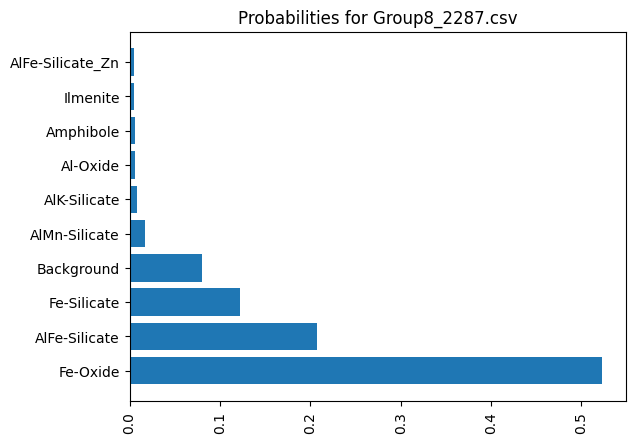

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s


The classification report for Group8_1680.csv (7):
               precision    recall  f1-score   support

     Al-Oxide       0.00      1.00      0.00         0
  Al-Silicate       0.75      1.00      0.86         9
AlCa-Silicate       0.20      1.00      0.33         2
AlFe-Silicate       0.87      0.88      0.88      1159
 AlK-Silicate       0.29      0.83      0.43         6
AlMn-Silicate       0.57      0.85      0.68       107
    Amphibole       0.85      0.94      0.89       622
   Background       0.93      0.94      0.94       547
      Epidote       0.92      0.82      0.87       330
     Fe-Oxide       0.94      0.90      0.92      2296
  Fe-Silicate       0.70      0.88      0.78        26
     Ilmenite       0.98      0.98      0.98      2742
    Leucoxene       0.50      1.00      0.67         1
     Mn-Oxide       0.00      1.00      0.00         0
     Monazite       0.89      1.00      0.94         8
       Quartz       0.50      1.00      0.67         3
       Rutile

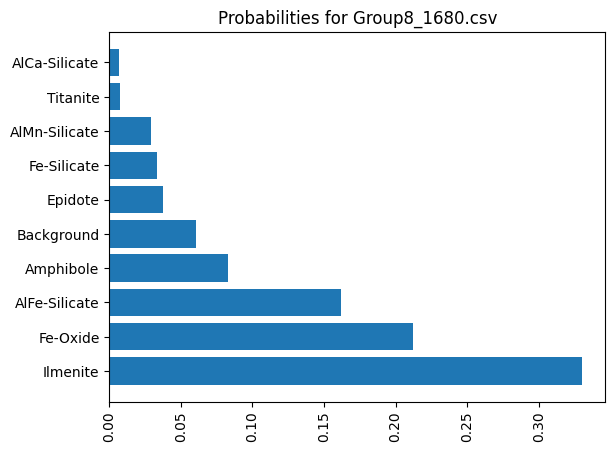

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s


The classification report for Group8_1425.csv (8):
                  precision    recall  f1-score   support

        Al-Oxide       0.12      0.67      0.20         9
     Al-Silicate       0.40      0.92      0.56       535
   AlCa-Silicate       0.05      1.00      0.10         4
   AlFe-Silicate       0.80      0.29      0.43       214
    AlK-Silicate       0.48      0.95      0.64       809
       Amphibole       0.61      0.57      0.59       320
         Apatite       0.72      1.00      0.84        52
      Background       1.00      0.57      0.73      3653
       Carbonate       0.00      1.00      0.00         0
         Epidote       0.86      0.81      0.83       638
        Fe-Oxide       0.94      0.90      0.92       380
     Fe-Silicate       0.77      0.85      0.81       156
        Ilmenite       0.90      0.65      0.75       159
       Leucoxene       0.37      1.00      0.54        20
        Mn-Oxide       1.00      0.00      0.00         1
        Monazite    

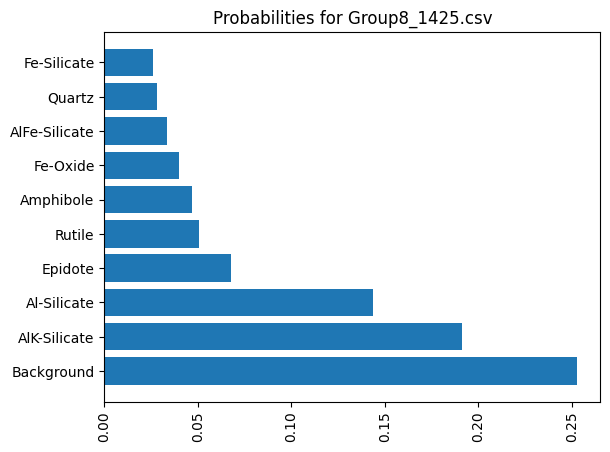

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s


The classification report for Group8_6913.csv (9):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      0.00      0.00         7
     Al-Silicate       0.49      0.95      0.64        40
   AlCa-Silicate       0.50      1.00      0.67         1
   AlFe-Silicate       0.60      0.58      0.59       191
AlFe-Silicate_Zn       0.22      1.00      0.36        30
    AlK-Silicate       0.42      0.93      0.58        45
   AlMn-Silicate       0.25      0.33      0.29         3
       Amphibole       0.82      0.85      0.83       491
         Apatite       0.25      1.00      0.40         1
      Background       0.85      0.98      0.91       588
          Barite       1.00      0.00      0.00         1
        Chromite       0.58      0.50      0.54        14
         Epidote       0.87      0.45      0.59        92
        Fe-Oxide       0.96      0.72      0.82      1012
     Fe-Silicate       0.73      0.75      0.74        64
        Ilmenite    

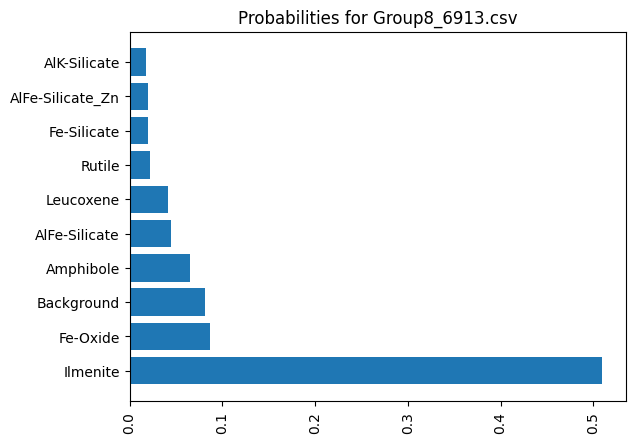

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_0521.csv (10):
               precision    recall  f1-score   support

            0       1.00      0.00      0.00         1
     Al-Oxide       0.29      1.00      0.44         2
  Al-Silicate       0.17      1.00      0.30       499
AlFe-Silicate       1.00      0.00      0.00         5
 AlK-Silicate       0.19      1.00      0.32        24
   Background       1.00      0.52      0.68      5963
  Cassiterite       0.69      1.00      0.82       859
      Epidote       1.00      1.00      1.00         1
     Fe-Oxide       1.00      1.00      1.00         9
     Ilmenite       1.00      0.00      0.00         1
    Leucoxene       0.00      1.00      0.00         0
     Monazite       0.73      1.00      0.84        73
       Quartz       0.47      0.96      0.63        24
       Rutile       1.00      1.00      1.00         2
      Thorite       1.00      1.00      1.00        13
       Zircon       0.95      0.99      0.97        89

     accura

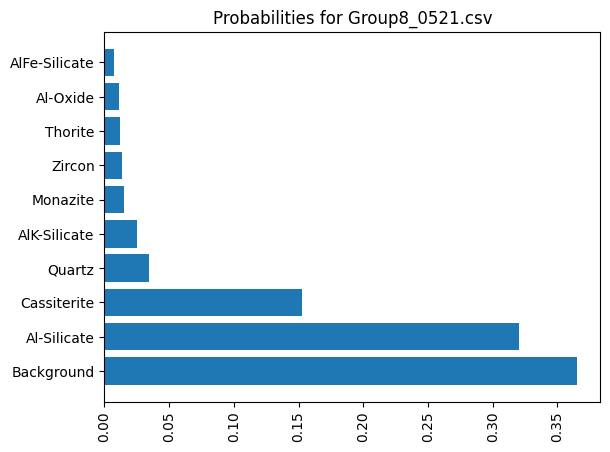

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_0489.csv (11):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.42      0.98      0.59        61
   AlCa-Silicate       0.09      1.00      0.17         1
   AlFe-Silicate       0.93      0.88      0.90      1629
AlFe-Silicate_Zn       0.41      0.90      0.57        21
    AlK-Silicate       0.44      0.86      0.59        37
   AlMn-Silicate       0.55      0.87      0.68       264
       Amphibole       0.77      0.80      0.78       122
         Apatite       0.87      1.00      0.93       136
      Background       0.96      0.82      0.88       859
        Chromite       0.96      1.00      0.98       187
         Epidote       0.96      0.47      0.63        49
        Fe-Oxide       0.93      0.77      0.84      1331
     Fe-Silicate       0.19      0.75      0.31        48
        Ilmenite       0.97      0.96      0.97      2179
       Leucoxene   

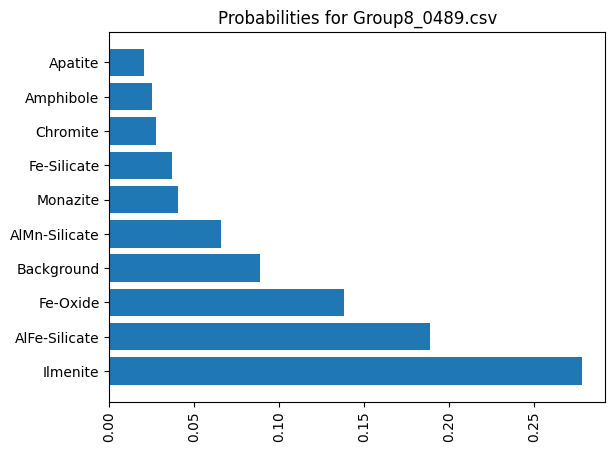

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s


The classification report for Group8_1536.csv (12):
               precision    recall  f1-score   support

     Al-Oxide       0.00      1.00      0.00         0
  Al-Silicate       0.45      1.00      0.62        17
AlCa-Silicate       0.29      0.87      0.43        39
AlFe-Silicate       0.67      0.22      0.33       188
 AlK-Silicate       0.38      0.98      0.55        49
AlMn-Silicate       1.00      0.91      0.95        32
    Amphibole       0.81      0.85      0.83       633
   Background       0.97      0.82      0.89       690
      Epidote       0.94      0.91      0.93      1424
     Fe-Oxide       0.97      0.97      0.97      3770
  Fe-Silicate       0.71      0.83      0.76       179
     Ilmenite       0.97      0.86      0.91       395
    Leucoxene       0.36      1.00      0.53        22
     Mn-Oxide       0.00      1.00      0.00         0
       Quartz       0.57      1.00      0.73        45
       Rutile       0.80      1.00      0.89        28
     Titanit

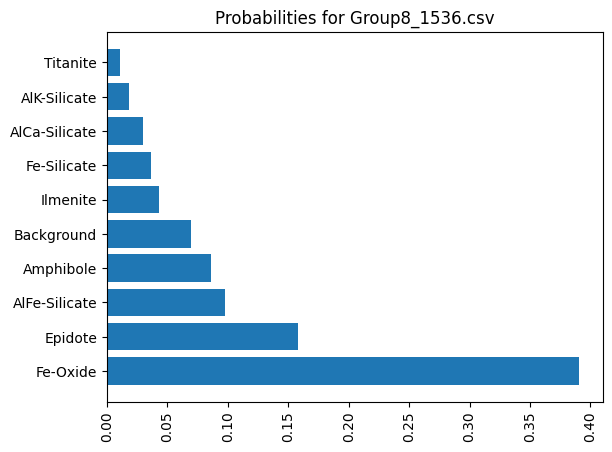

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_3583.csv (13):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.49      0.98      0.65        49
   AlFe-Silicate       0.53      0.44      0.48       529
AlFe-Silicate_Zn       0.17      1.00      0.29         1
    AlK-Silicate       0.00      1.00      0.00         0
   AlMn-Silicate       0.96      0.90      0.93        51
       Amphibole       1.00      0.00      0.00         2
      Background       0.99      0.83      0.91       951
          Barite       0.56      1.00      0.72        14
        Fe-Oxide       0.96      0.90      0.93      4693
     Fe-Silicate       0.67      0.98      0.80      1066
        Ilmenite       0.93      0.88      0.90       194
       Leucoxene       0.48      1.00      0.65        15
        Mn-Oxide       0.00      1.00      0.00         0
          Quartz       0.00      1.00      0.00         0
          Rutile   

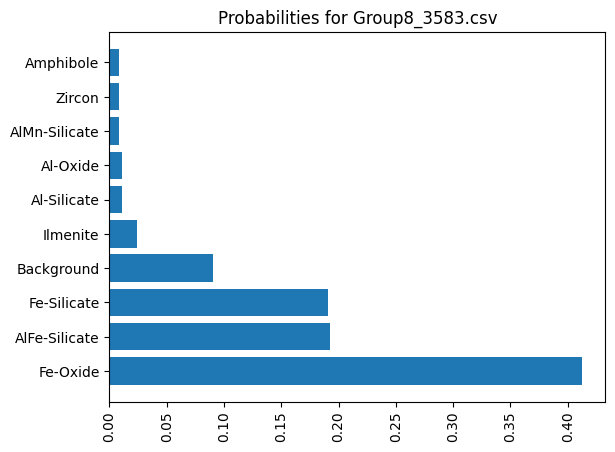

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.4s


The classification report for Group8_3812.csv (14):
               precision    recall  f1-score   support

AlFe-Silicate       0.30      0.05      0.09       177
 AlK-Silicate       0.00      1.00      0.00         0
   Background       0.89      0.98      0.94       383
     Fe-Oxide       0.98      0.99      0.98      6760
  Fe-Silicate       0.82      0.91      0.86        45
     Ilmenite       1.00      0.91      0.95        11
    Leucoxene       0.25      1.00      0.40         1
       Quartz       0.43      1.00      0.60         3
       Rutile       1.00      0.91      0.95        23
       Zircon       0.96      1.00      0.98       165

     accuracy                           0.97      7568
    macro avg       0.66      0.88      0.68      7568
 weighted avg       0.95      0.97      0.96      7568

Accuracy (14): 86.57%          (Min: 61.65%, Max: 96.67%)
Precision (14): 91.26%        (Min: 83.33%, Max: 96.82%)
Recall (14): 86.57%              (Min: 61.65%, Max: 96.67%)


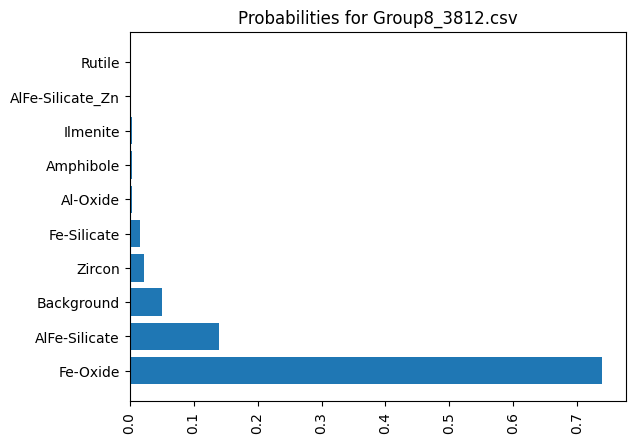

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s


The classification report for Group8_8280.csv (15):
                  precision    recall  f1-score   support

        Al-Oxide       0.40      0.99      0.57        72
     Al-Silicate       0.49      0.94      0.64       102
   AlCa-Silicate       0.53      0.95      0.68       131
   AlFe-Silicate       0.87      0.73      0.79       166
AlFe-Silicate_Zn       0.37      0.94      0.53        17
    AlK-Silicate       0.42      0.94      0.58        65
   AlMn-Silicate       0.59      0.88      0.71       128
       Amphibole       0.57      0.73      0.64       134
         Apatite       0.85      1.00      0.92        29
      Background       0.98      0.92      0.95      7314
          Barite       0.76      0.91      0.83        92
       Carbonate       0.75      0.99      0.85       199
     Cassiterite       0.85      0.99      0.91       136
       Celestine       0.91      1.00      0.96        32
        Chromite       0.84      0.96      0.89       467
        Cinnabar   

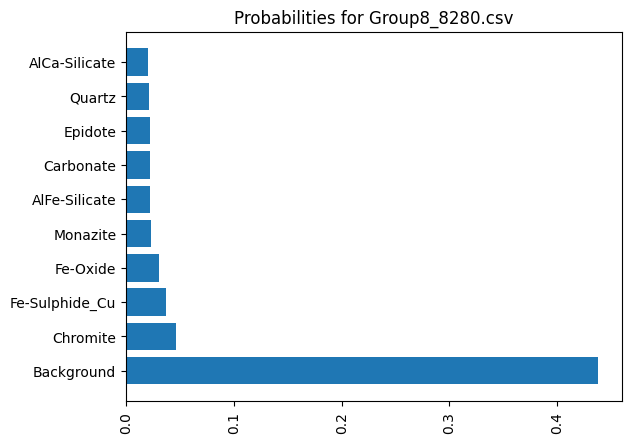

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.6s


The classification report for Group8_0435.csv (16):
               precision    recall  f1-score   support

AlCa-Silicate       0.10      1.00      0.18        15
AlFe-Silicate       0.74      0.39      0.51       518
 AlK-Silicate       0.24      0.98      0.39       122
AlMn-Silicate       0.62      0.97      0.76       126
    Amphibole       0.77      0.83      0.80      1182
   Background       1.00      0.77      0.87       991
      Epidote       0.87      0.85      0.86      1540
     Fe-Oxide       0.98      0.80      0.88      2193
  Fe-Silicate       0.49      0.81      0.62       279
     Ilmenite       0.91      0.81      0.86       149
    Leucoxene       0.19      1.00      0.32         3
     Mn-Oxide       0.00      1.00      0.00         0
     Monazite       0.60      1.00      0.75         3
       Quartz       0.26      1.00      0.42        11
       Rutile       0.79      0.97      0.87       189
     Titanite       0.52      0.94      0.67        35
      Unknow

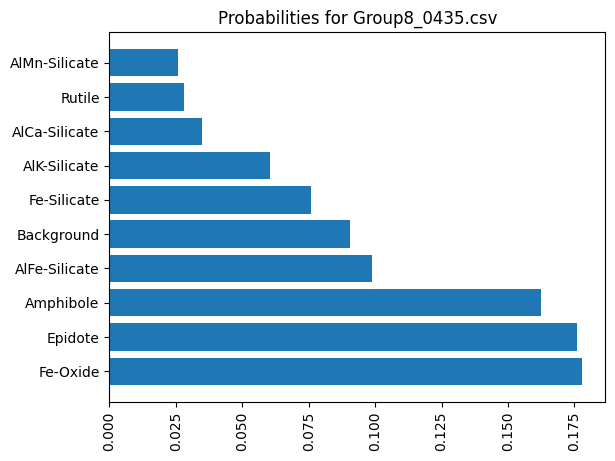

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_3258.csv (17):
               precision    recall  f1-score   support

AlCa-Silicate       0.00      1.00      0.00         0
AlFe-Silicate       0.62      0.19      0.29       257
 AlK-Silicate       0.34      0.92      0.50       273
    Amphibole       0.63      0.80      0.70       590
   Background       0.98      0.64      0.78      1877
  Cassiterite       1.00      1.00      1.00         7
     Chromite       1.00      0.00      0.00         1
      Epidote       0.67      0.78      0.72       984
     Fe-Oxide       0.97      0.86      0.91      1537
  Fe-Silicate       0.48      0.75      0.59       130
  Fe-Sulphide       0.75      1.00      0.86         6
     Ilmenite       0.83      0.76      0.79       467
    Leucoxene       0.06      1.00      0.11         2
     Monazite       0.81      0.95      0.88        41
       Quartz       0.34      0.97      0.50       124
 REE-Silicate       0.00      1.00      0.00         0
       Rutil

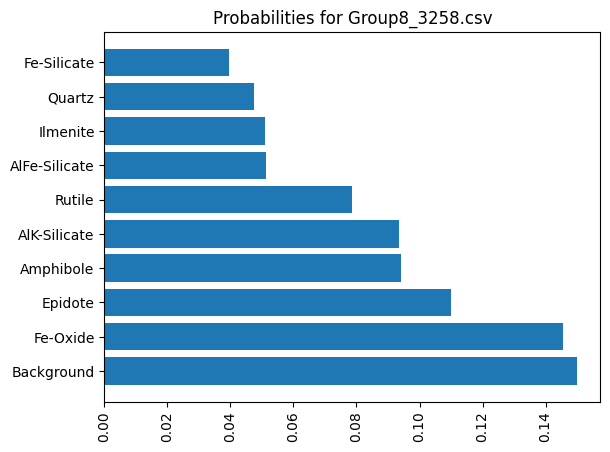

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s


The classification report for Group8_6874.csv (18):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.67      0.67      0.67         3
   AlCa-Silicate       0.00      1.00      0.00         0
   AlFe-Silicate       0.67      0.49      0.57       133
AlFe-Silicate_Zn       0.12      1.00      0.22         1
    AlK-Silicate       0.21      0.75      0.33         4
   AlMn-Silicate       0.27      0.80      0.40         5
       Amphibole       0.83      0.84      0.84      1216
         Apatite       0.44      1.00      0.62         4
      Background       0.94      0.98      0.96      1973
         Epidote       0.82      0.55      0.66       258
        Fe-Oxide       0.96      0.76      0.85       962
     Fe-Silicate       0.42      0.82      0.55        49
        Ilmenite       0.95      0.96      0.95      2525
       Leucoxene       0.29      1.00      0.44         6
        Mn-Oxide   

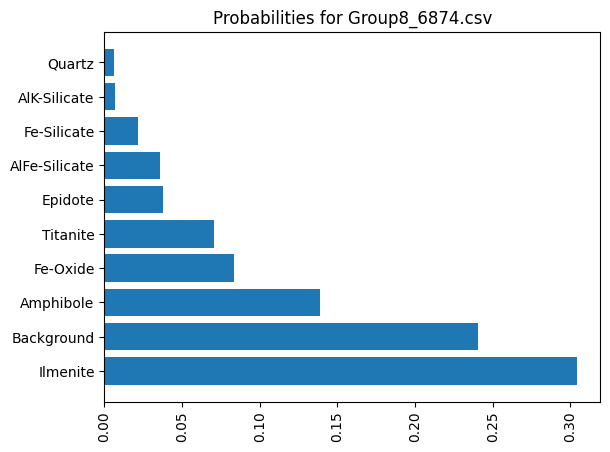

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s


The classification report for Group8_3612.csv (19):
               precision    recall  f1-score   support

     Al-Oxide       0.13      1.00      0.23         8
  Al-Silicate       0.57      0.97      0.72       180
AlFe-Silicate       0.69      0.58      0.63       460
   Background       0.99      0.74      0.84       779
       Barite       0.59      1.00      0.74        16
    Celestine       0.86      1.00      0.92         6
     Fe-Oxide       0.98      0.96      0.97      5314
  Fe-Silicate       0.74      0.96      0.83       502
  Fe-Sulphide       0.00      1.00      0.00         0
     Ilmenite       0.96      0.81      0.88        91
    Leucoxene       0.39      1.00      0.56         9
     Mn-Oxide       1.00      0.00      0.00         1
     Monazite       0.00      0.00      0.00         1
       Quartz       0.81      1.00      0.90       133
       Rutile       0.92      0.96      0.94        49
      Unknown       1.00      0.00      0.00         3
       Zirco

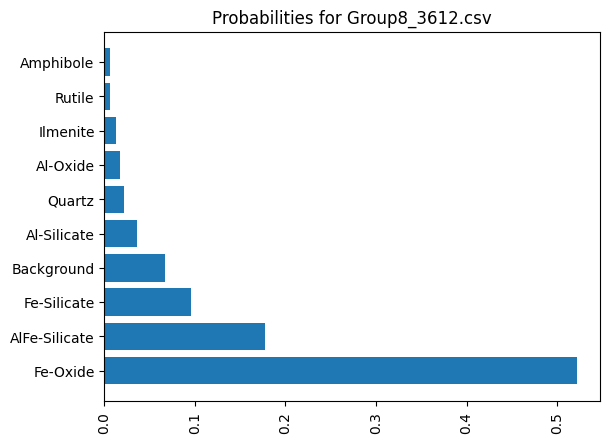

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.8s


The classification report for Group8_7360.csv (20):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.77      1.00      0.87        24
   AlCa-Silicate       0.42      0.77      0.55        22
   AlFe-Silicate       0.82      0.81      0.82      1286
AlFe-Silicate_Zn       0.00      1.00      0.00         0
    AlK-Silicate       0.36      0.89      0.52         9
   AlMn-Silicate       0.79      0.98      0.88       932
       Amphibole       0.78      0.66      0.72       612
         Apatite       0.50      1.00      0.67         1
      Background       0.83      0.98      0.90       723
       Carbonate       0.00      1.00      0.00         0
        Chromite       1.00      1.00      1.00        10
         Epidote       0.94      0.84      0.89       757
        Fe-Oxide       0.95      0.78      0.86      1873
     Fe-Silicate       0.70      0.86      0.77       443
     Fe-Sulphide   

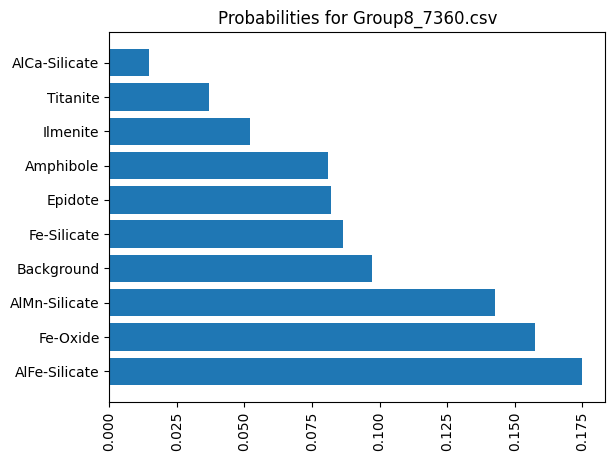

In [ ]:
# Usage
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/CH Counts Data'
model_path = "/content/drive/My Drive/random_forest_model_5000.pkl"
evaluate_random_samples(data_dir, model_path, n_samples=20)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from joblib import load
import random

def compute_entropy(probs):
    """
    Compute entropy given a list of probabilities.
    """
    return -np.sum(probs * np.log2(probs + np.finfo(float).eps))

def compute_max_entropy(probs):
    """
    Compute the maximum possible entropy given the probabilities.
    """
    num_non_zero_classes = np.sum(probs > 0)
    return np.log2(num_non_zero_classes)

def visualise_average_class_probabilities(data_directory, model_path, n_samples=None):

    # Load the trained model
    trained_model = load(model_path)

    # Create a sequence of file names
    train_file_numbers = range(1, 8328)
    train_file_names = [os.path.join(data_directory, f"Group8_{str(i).zfill(4)}.csv") for i in train_file_numbers]

    # If n_samples is specified, randomly select that many files
    if n_samples:
        train_file_names = random.sample(train_file_names, n_samples)

    for name in train_file_names:
        # Extract just the filename from the full path
        filename = os.path.basename(name)

        # Read the data file
        df = pd.read_csv(name)
        df = df.fillna(0)
        df = df.drop(df.iloc[:, 2800:-2], axis=1)
        df = df.drop(df.iloc[:, :126], axis=1)

        X = df.iloc[:, :-1]

        # Get class probabilities for all samples
        y_prob = trained_model.predict_proba(X)

        # Extract class names from the trained model
        class_names = trained_model.classes_

        # Calculate average entropy across all samples
        avg_entropy = np.mean([compute_entropy(probs) for probs in y_prob])

        # Calculate maximum possible entropy for the file
        max_entropy = compute_max_entropy(y_prob.mean(axis=0))

        # Calculate the percentage of the average entropy relative to the maximum possible entropy
        entropy_percentage = (avg_entropy / max_entropy) * 100

        # Calculate average probabilities for each class across all samples
        avg_probabilities = y_prob.mean(axis=0)

        # Get the top 10 classes based on average probabilities
        top_10_indices = avg_probabilities.argsort()[-10:][::-1]
        top_10_probs = avg_probabilities[top_10_indices]
        top_10_classes = class_names[top_10_indices]

        # Plot average probabilities for top 10 classes
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.bar(top_10_classes, top_10_probs)
        plt.title(f'Average Probabilities for Top 10 Classes ({filename})', fontsize=16)
        plt.xlabel('Class', fontsize=14)
        plt.ylabel('Average Probability', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.ylim(0, 1)

        # Determine the color based on the entropy_percentage
        if entropy_percentage < 25:
            color = 'green'
        elif entropy_percentage <= 30:
            color = 'orange'
        else:
            color = 'red'

        # Plot average entropy with the determined color
        plt.subplot(1, 2, 2)
        plt.bar(["Avg Entropy"], [avg_entropy], color=color)
        plt.text(0, avg_entropy - 0.5,
                f'{avg_entropy:.2f}\n({entropy_percentage:.2f}% of max {max_entropy:.2f})',
                ha='center', color='white', fontsize=16)

        plt.title('Average Entropy', fontsize=16)
        plt.ylim(0, np.log2(len(class_names)))
        plt.tight_layout()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | e

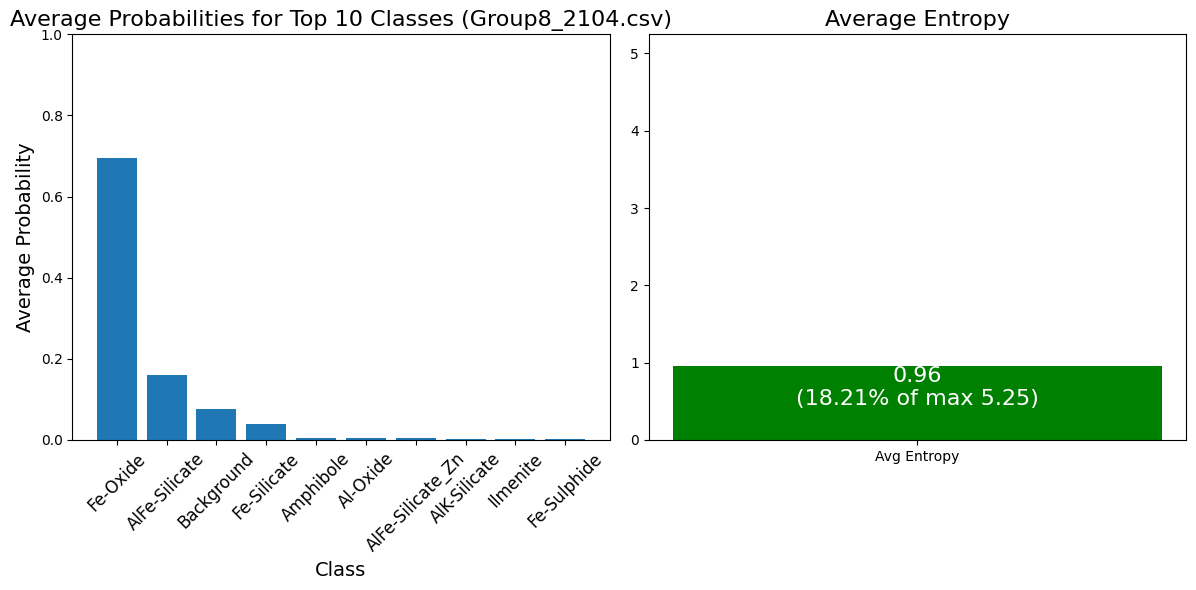

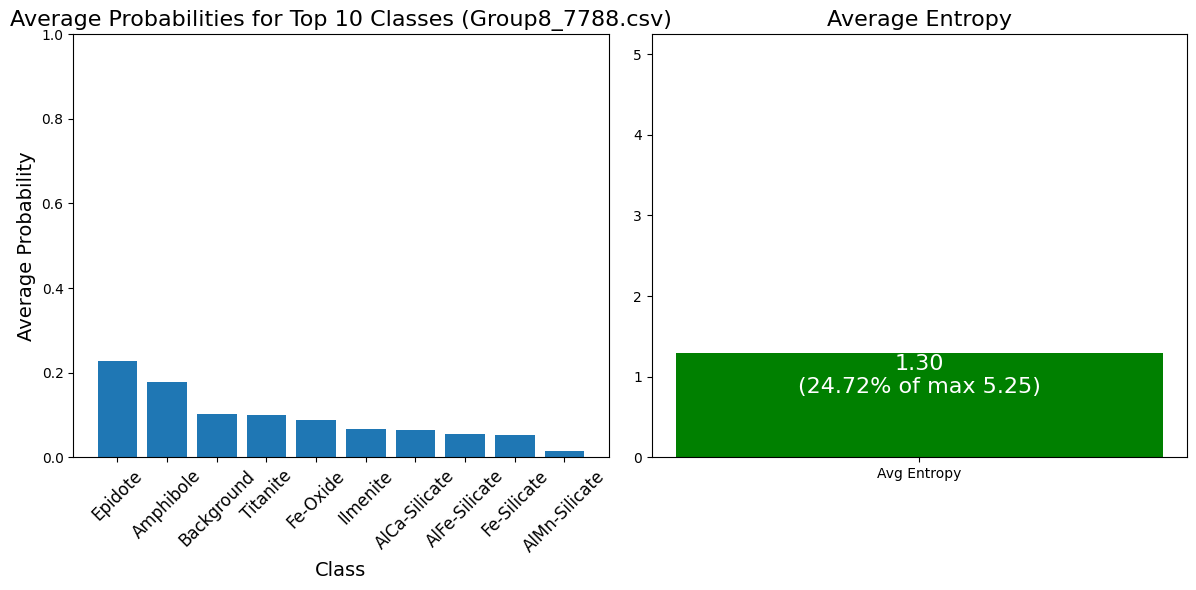

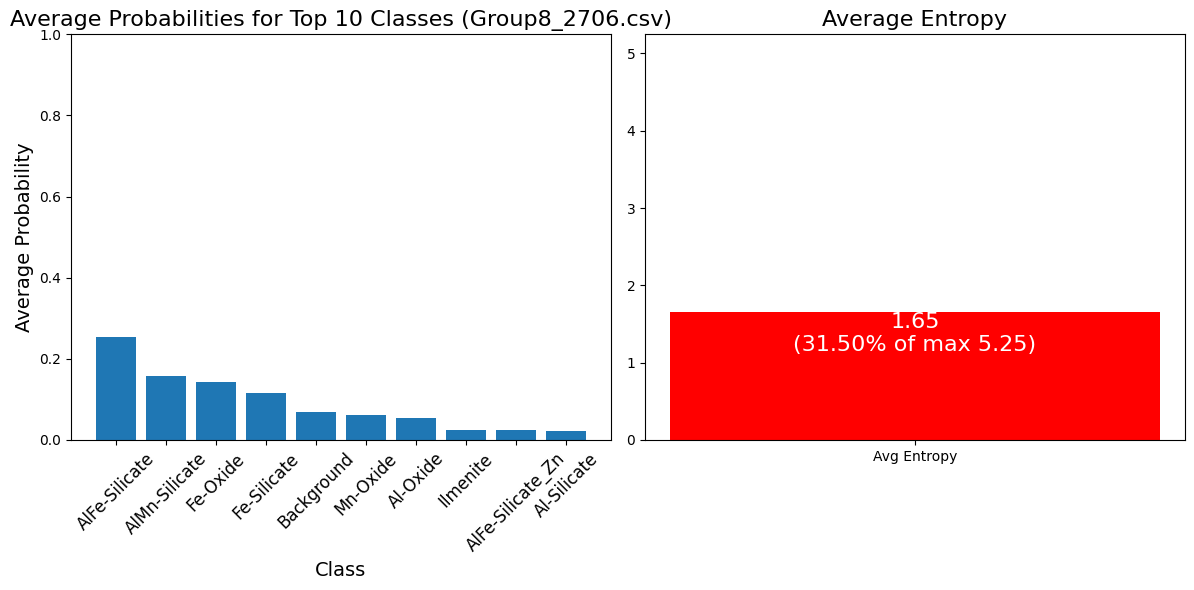

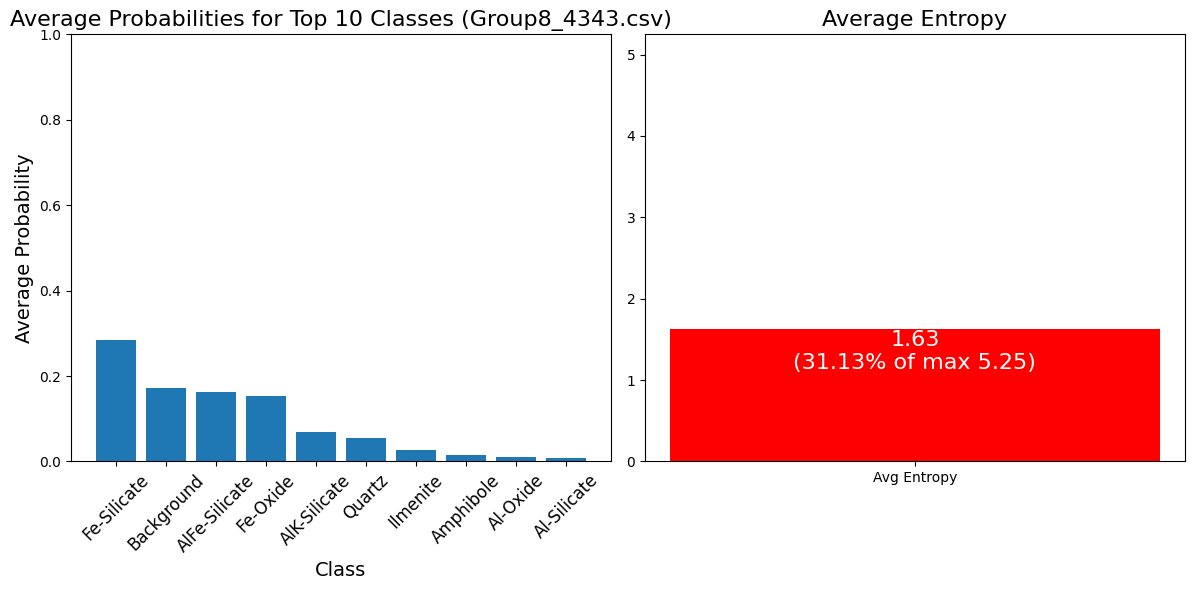

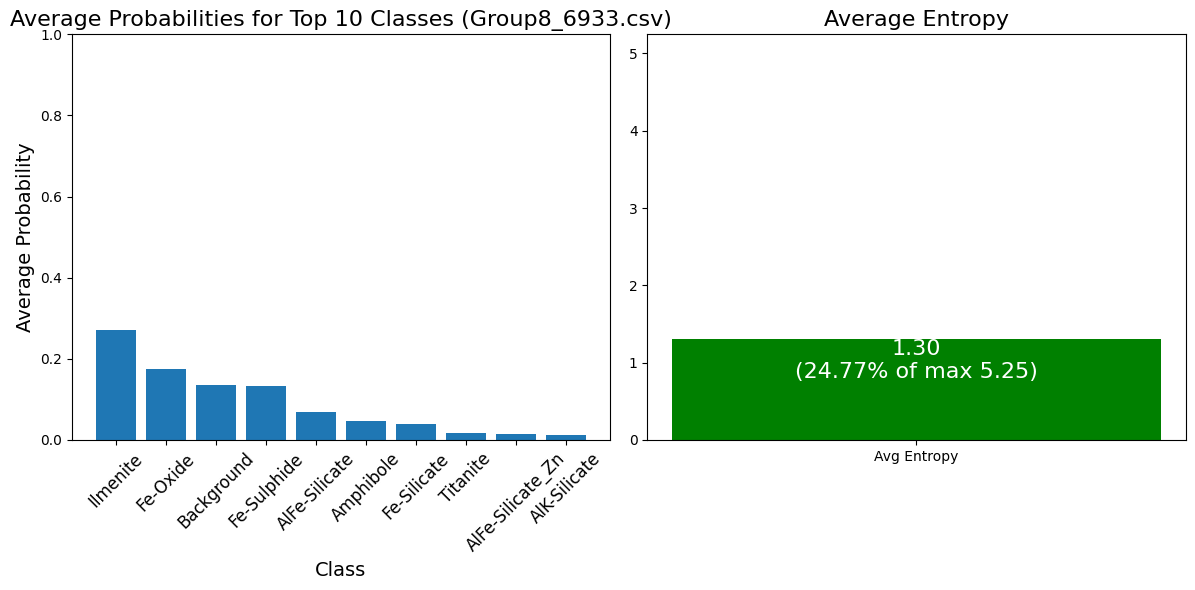

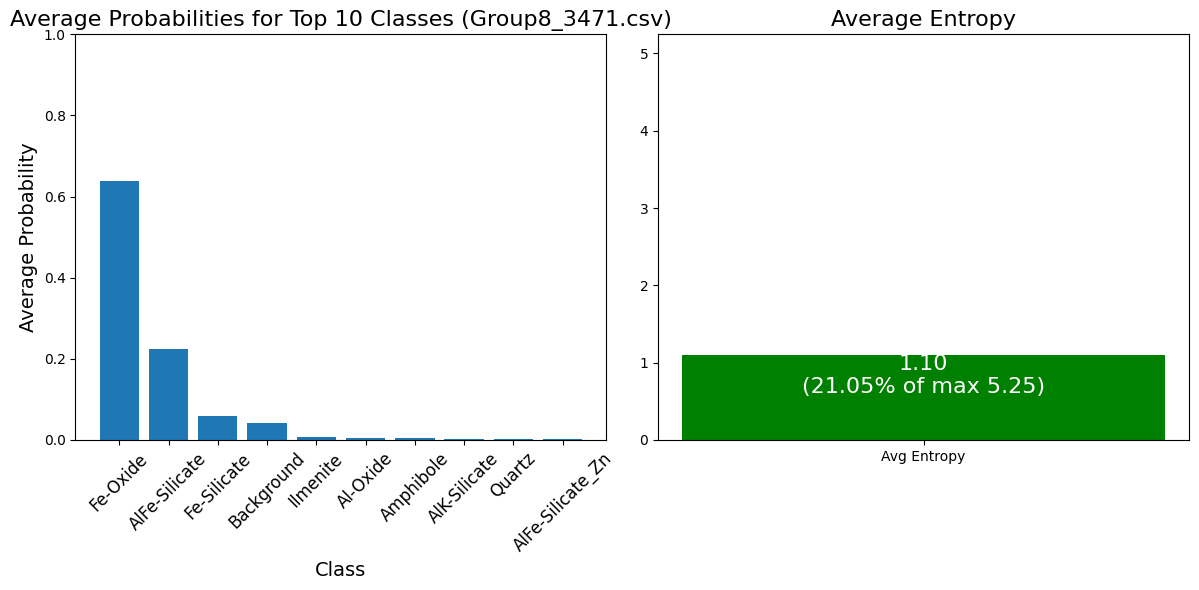

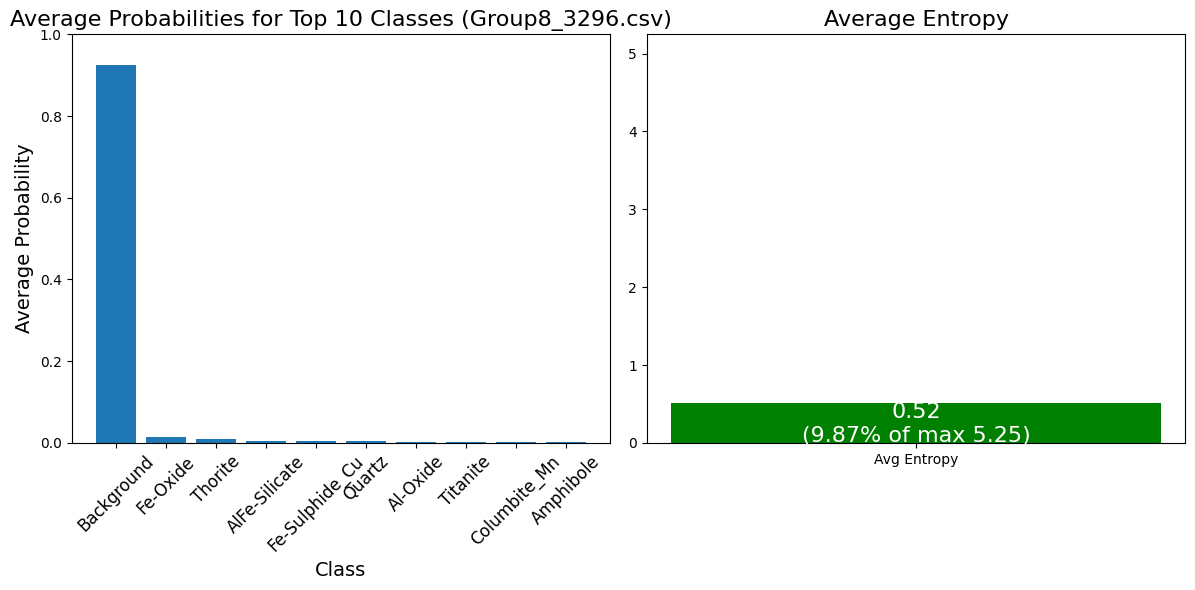

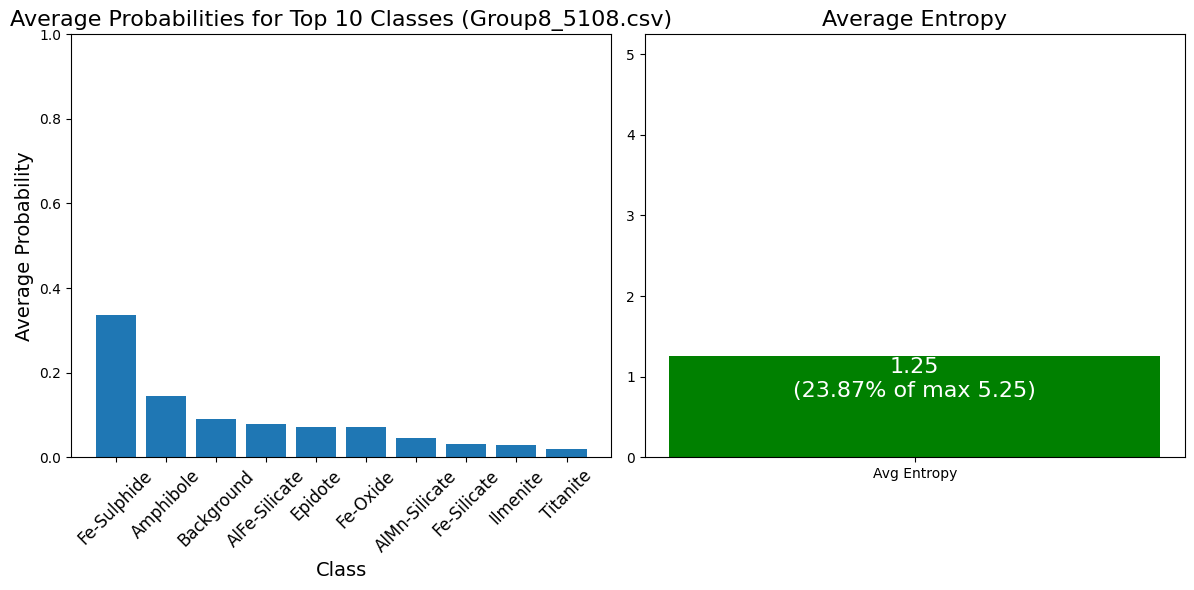

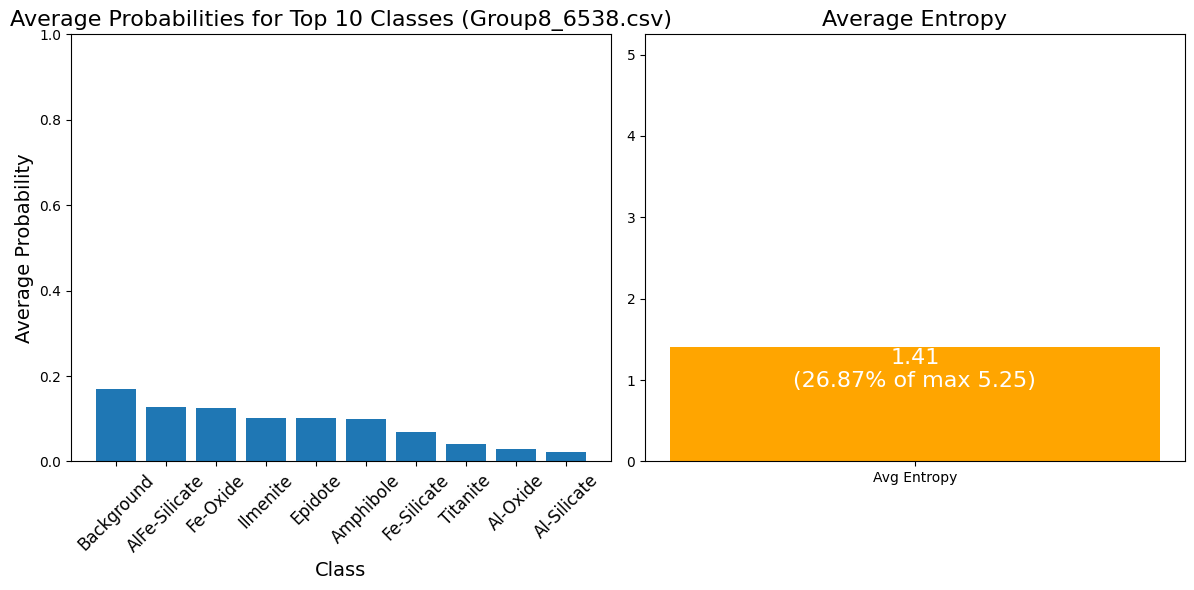

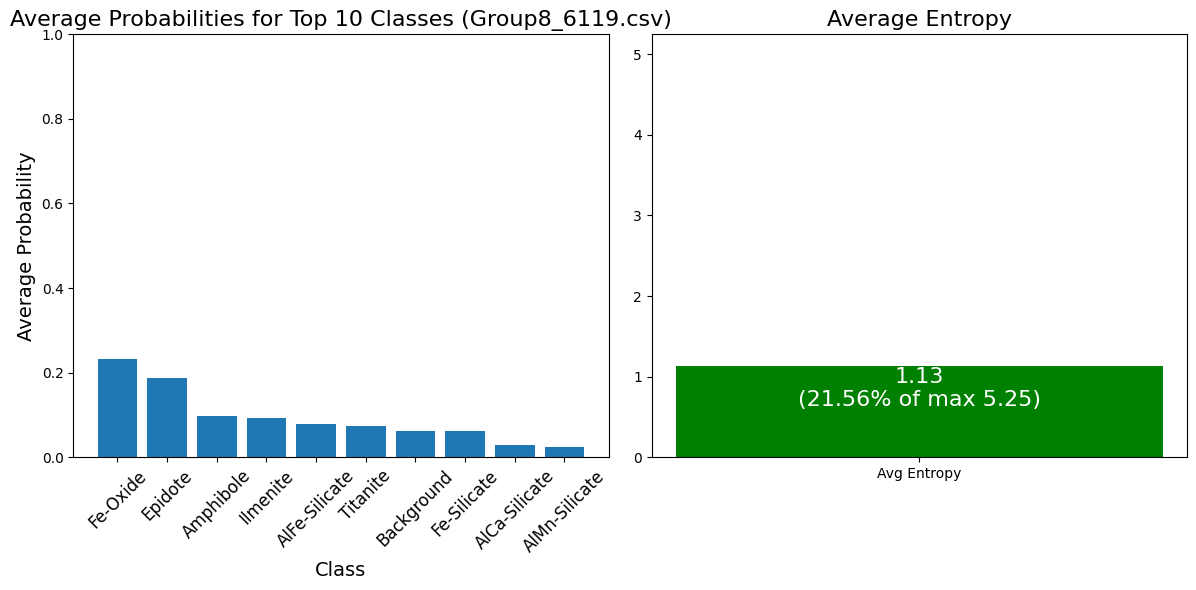

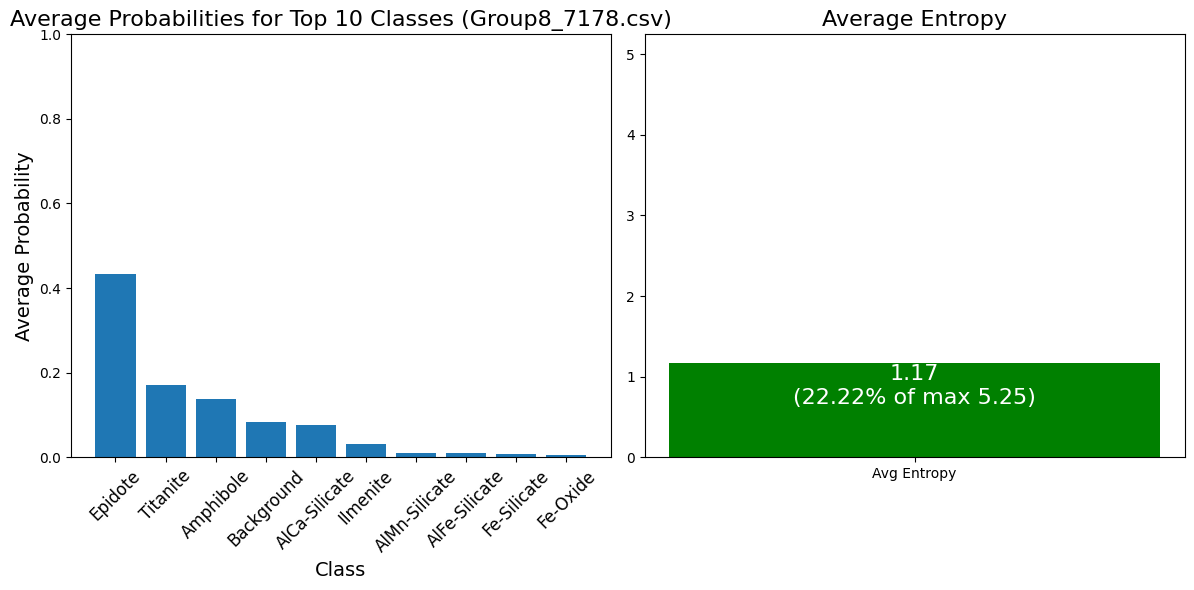

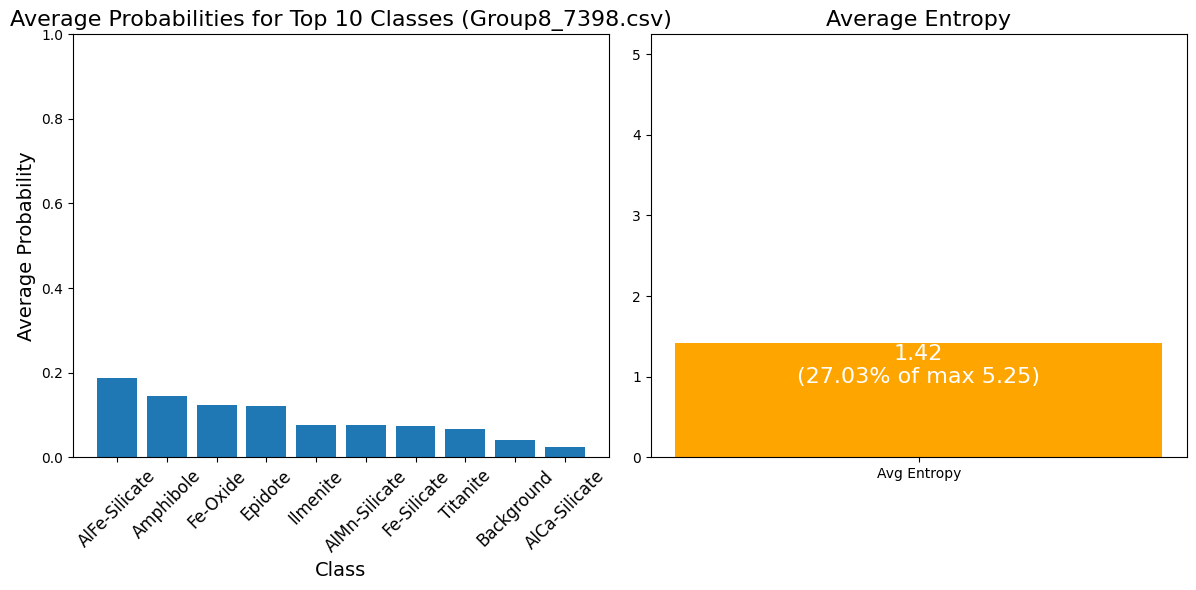

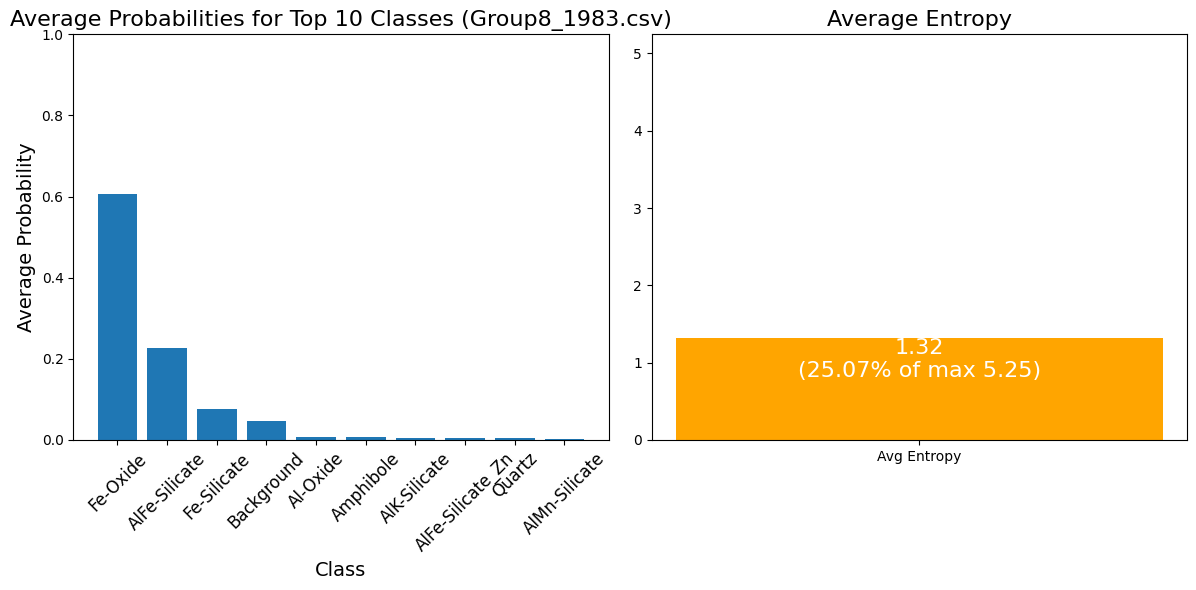

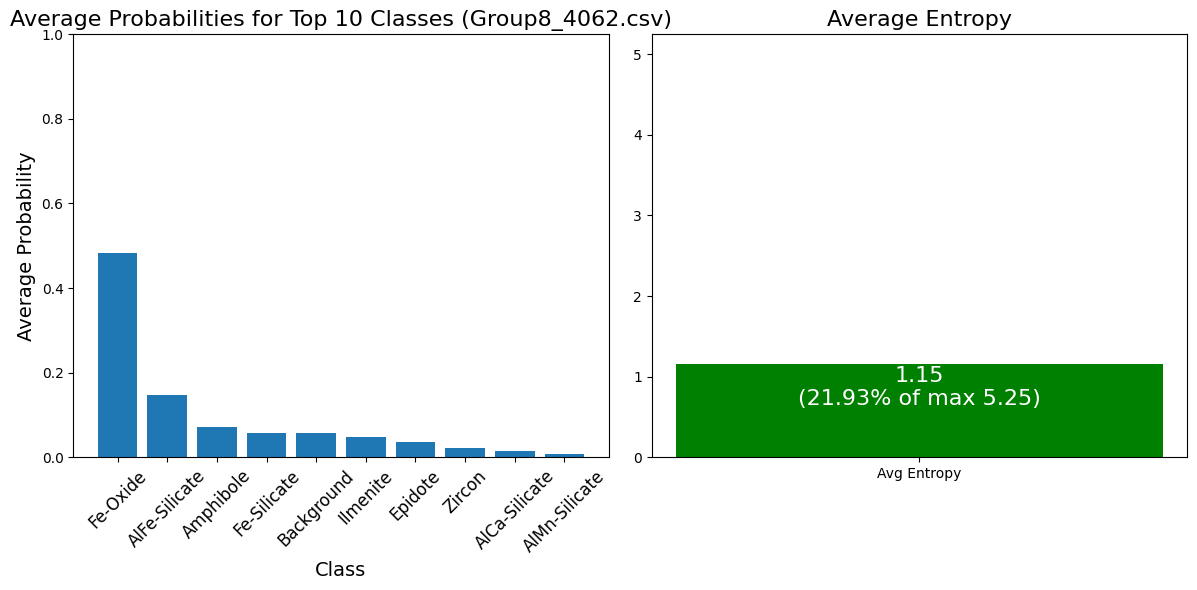

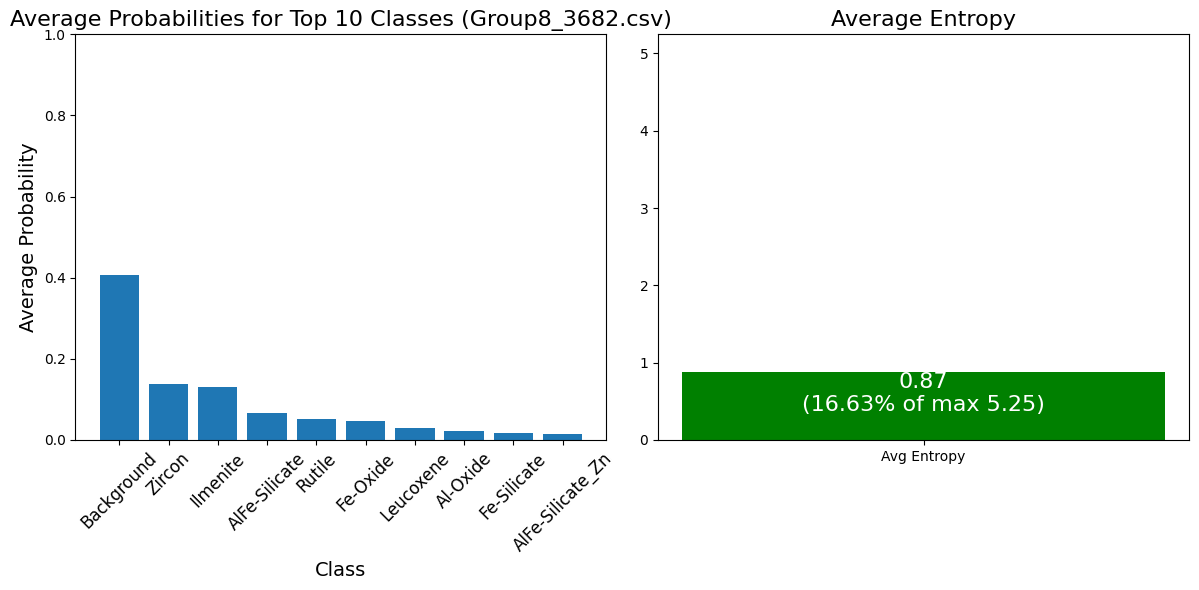

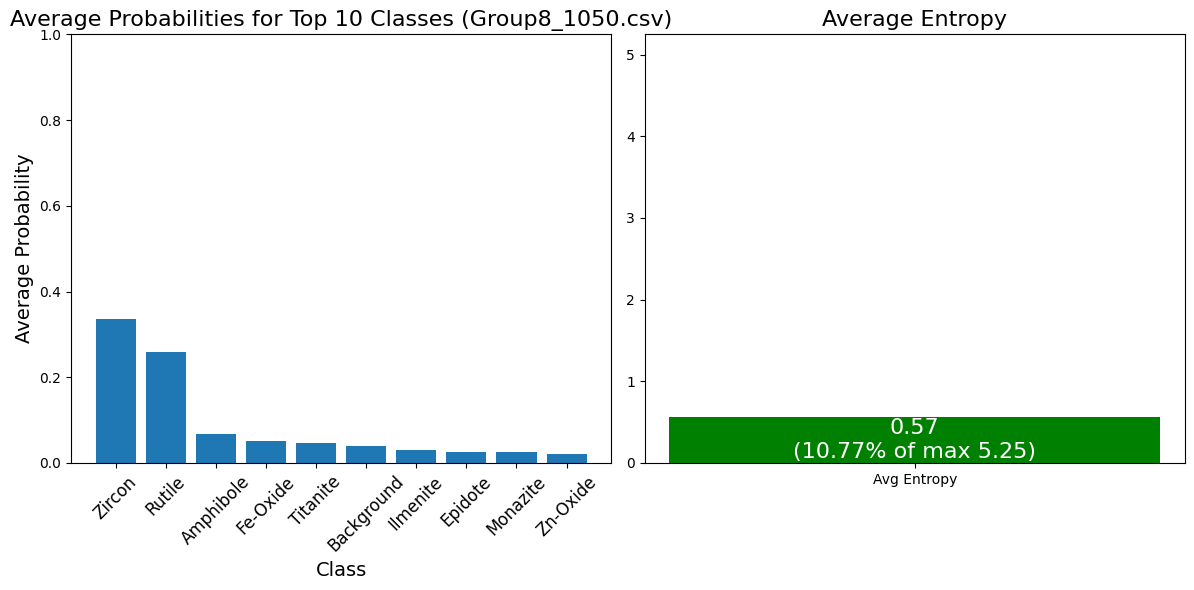

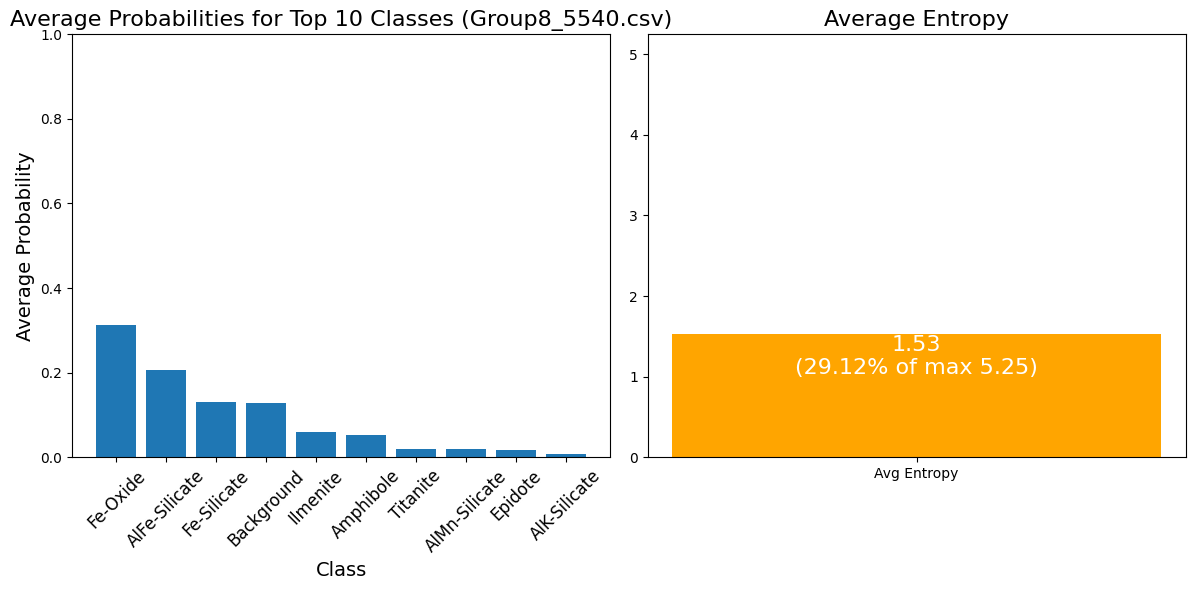

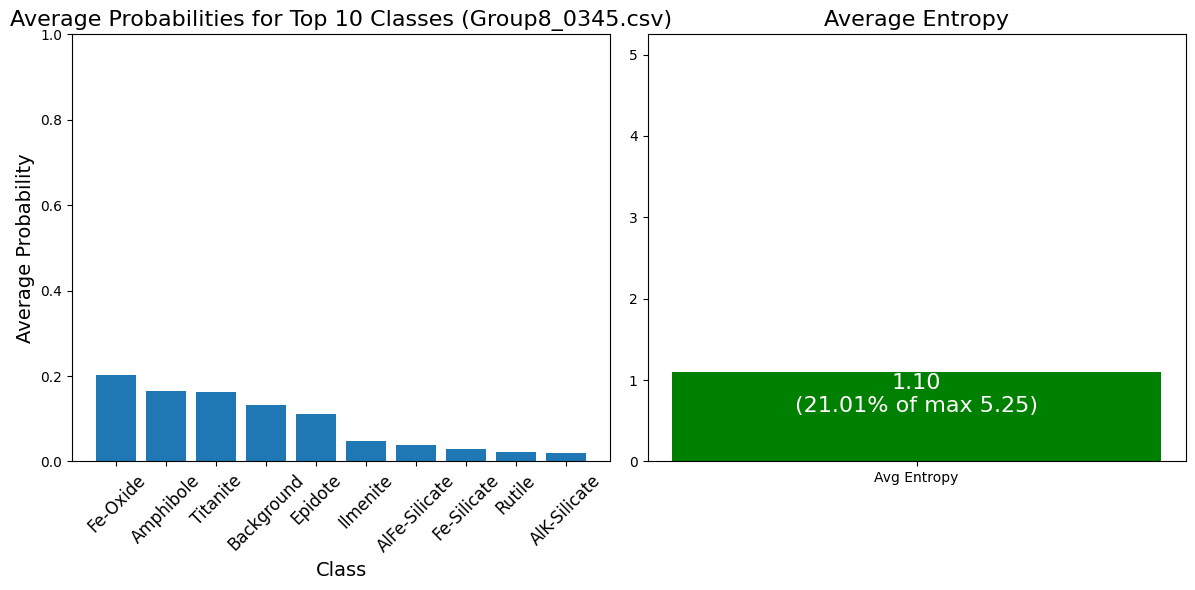

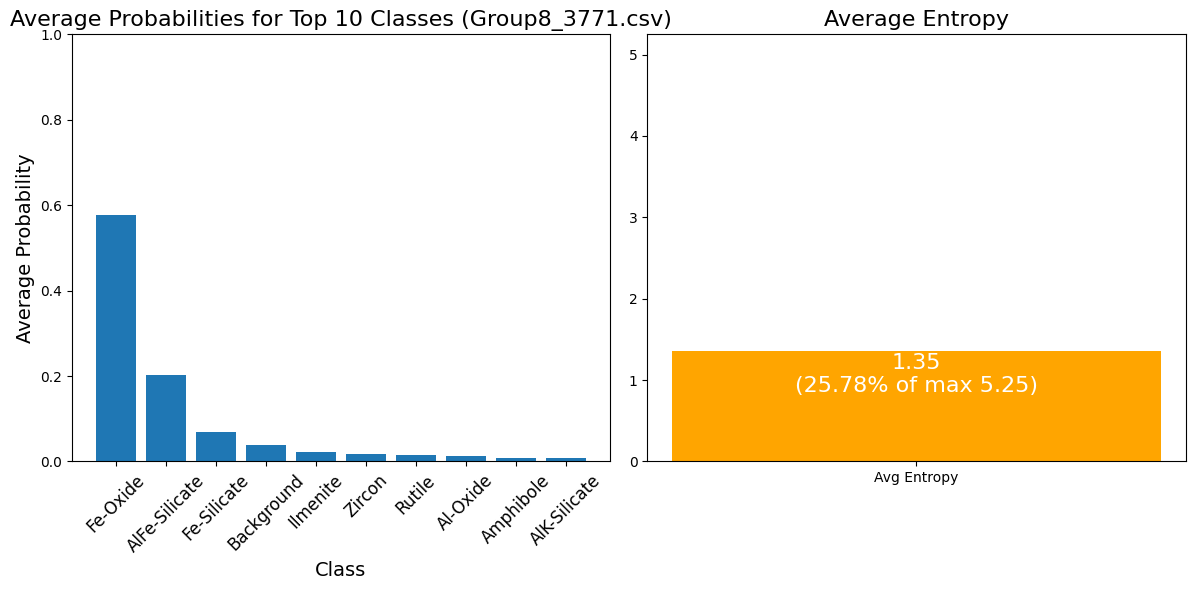

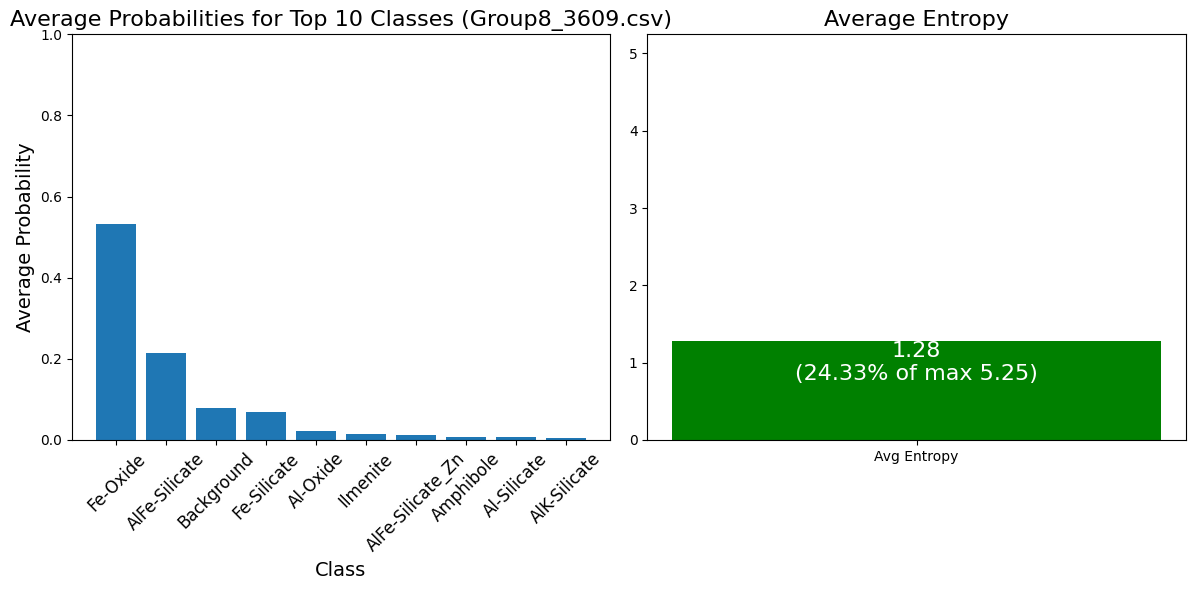

In [ ]:
from joblib import load
visualise_average_class_probabilities(data_dir, model_path, n_samples=20)